In [398]:
import os
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt

In [516]:
data_dir = 'dataset2'
#data_dir2 = 'dataset2_without_pc'
#data_dir = data_dir2
if os.path.exists(data_dir):
    pass
else:
    os.mkdir(data_dir)

In [407]:
if os.path.isdir(data_dir):
    if not os.path.isdir(os.path.join(data_dir, 'OilReservoir')):
        os.mkdir(os.path.join(data_dir, 'OilReservoir'))
    else:
        files = glob.glob(os.path.join(data_dir, 'OilReservoir/*'))
        for f in files:
            os.remove(f)
    if not os.path.isdir(os.path.join(data_dir, 'NoOilReservoir')):
        os.mkdir(os.path.join(data_dir, 'NoOilReservoir'))
    else:
        files = glob.glob(os.path.join(data_dir, 'NoOilReservoir/*'))
        for f in files:
            os.remove(f)

In [401]:
data = np.load('raw_inv_data/seismic_cube_raw.npy')

In [402]:
data.shape[2]

450

In [517]:
data_dir1 = os.path.join(data_dir, 'OilReservoir')
data_dir2 = os.path.join(data_dir, 'NoOilReservoir')
data_dir1, data_dir2

('dataset2/OilReservoir', 'dataset2/NoOilReservoir')

In [408]:
#for the first dataset
counter1 = 0
counter2 = 0
for i in range(0, 450):
    if i >= 134 and i < 224:
        plt.imsave(os.path.join(data_dir, 'OilReservoir', "oil_reservoir" + str(counter1) + ".png"), data[:, :, i],cmap = 'seismic', format='png')
        counter1 += 1
    elif i < 134 or (i > 224 and i < 450):        
        plt.imsave(os.path.join(data_dir, 'NoOilReservoir', "no_oil_reservoir" + str(counter2) + ".png"), data[:, :, i],cmap = 'seismic', format='png')
        counter2 += 1
len(os.listdir('dataset1/OilReservoir')), len(os.listdir('dataset1/NoOilReservoir'))

(91, 360)

In [168]:
 #for the second dataset
counter1 = 0
counter2 = 0
for i in range(data.shape[2]):
    if  i >= 275 and i <= 300 :
        pass
    elif i >= 335 and i<= 347 : #(i >= 275 and i <= 300 and i >= 335 and i<= 347):
        pass        
    elif i > 135 and i < 225 :
        plt.imsave(os.path.join(data_dir1, "oil_reservoir" + str(counter1) + ".png"), data[:, :, i],cmap = 'seismic', format='png')
        counter1 += 1
    else:
        plt.imsave(os.path.join(data_dir2, "no_oil_reservoir" + str(counter2) + ".png"), data[:, :, i],cmap = 'seismic', format='png')
        counter2 += 1
 #i>= 0 and i <= 134 and i >= 226 and i <= 275 and i >= 301 and i <= 334 and i>= 348 and i < 450   

In [518]:
train_dir = 'train'
val_dir = 'val'
test_dir = 'test'
test_data_portion = 0.15
val_data_portion = 0.15

ImagesOf_NoOil=len(os.listdir(data_dir +'/NoOilReservoir'))
ImagesOf_Oil=len(os.listdir('dataset1/OilReservoir'))
nb_images = ImagesOf_Oil 
nb_images_no = ImagesOf_NoOil 

img_width, img_height = 640, 401
input_shape = (img_width, img_height, 3)

epochs = 30  
batch_size = 32 



In [519]:
nb_images, nb_images_no

(91, 320)

In [520]:
def create_directory(dir_name):
    if os.path.exists(os.path.join(data_dir, dir_name)):
        shutil.rmtree(os.path.join(data_dir, dir_name))
    os.makedirs(os.path.join(data_dir, dir_name))
    os.makedirs(os.path.join(data_dir, dir_name, "oil_reservoir"))
    os.makedirs(os.path.join(data_dir, dir_name, "no_oil_reservoir"))

In [521]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

In [522]:
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))
print(start_val_data_idx)
print(start_test_data_idx)

63
77


In [523]:
start_val_data_idx_no = int(nb_images_no * (1 - val_data_portion - test_data_portion))
start_test_data_idx_no = int(nb_images_no * (1 - test_data_portion))
print(start_val_data_idx_no)
print(start_test_data_idx_no)

224
272


In [524]:
def copy_oil_res_images(start_index, end_index, data_dir1, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(data_dir1, "oil_reservoir" + str(i) + ".png"), 
                   os.path.join(data_dir, dest_dir, "oil_reservoir"))

In [525]:
def copy_no_oil_res_images(start_index, end_index, data_dir2, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(data_dir2, "no_oil_reservoir" + str(i) + ".png"), 
                   os.path.join(data_dir, dest_dir, "no_oil_reservoir"))
        

In [526]:
copy_oil_res_images(0, start_val_data_idx, data_dir1, train_dir)
copy_oil_res_images(start_val_data_idx, start_test_data_idx, data_dir1, val_dir)
copy_oil_res_images(start_test_data_idx, nb_images, data_dir1, test_dir)

In [527]:
copy_no_oil_res_images(0, start_val_data_idx_no, data_dir2, train_dir)
copy_no_oil_res_images(start_val_data_idx_no, start_test_data_idx_no, data_dir2, val_dir)
copy_no_oil_res_images(start_test_data_idx_no, nb_images_no, data_dir2, test_dir)

In [533]:
a = len(os.listdir('dataset2/test/oil_reservoir'))
b = len(os.listdir('dataset2/train/oil_reservoir'))
c = len(os.listdir('dataset2/val/oil_reservoir'))
print(a, b, c)
print(len(os.listdir('dataset2/OilReservoir')))
print(a+b+c == len(os.listdir('dataset1/OilReservoir')))

14 63 14
92
True


In [535]:
a = len(os.listdir('dataset2/test/no_oil_reservoir'))
b = len(os.listdir('dataset2/train/no_oil_reservoir'))
c = len(os.listdir('dataset2/val/no_oil_reservoir'))
print(a+b+c == len(os.listdir('dataset2/NoOilReservoir')))

True


In [136]:
# Files removing
files = glob.glob('dataset2_without_pc_in/OilReservoir/*.png')
for f in files:
    os.remove(f)


In [137]:
shutil.rmtree('dataset2_without_pc_in')

# CNN

In [487]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

In [461]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape)) # increase the number  of neurons 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [462]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Image Generator

In [488]:
from keras.preprocessing.image import ImageDataGenerator

In [536]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [537]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [538]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, train_dir),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 287 images belonging to 2 classes.


In [539]:
train_generator.__dict__

{'image_data_generator': <tensorflow.python.keras.preprocessing.image.ImageDataGenerator at 0x7f0ed8975c10>,
 'target_size': (640, 401),
 'color_mode': 'rgb',
 'data_format': 'channels_last',
 'image_shape': (640, 401, 3),
 'save_to_dir': None,
 'save_prefix': '',
 'save_format': 'png',
 'interpolation': 'nearest',
 'split': None,
 'subset': None,
 'directory': 'dataset2/train',
 'classes': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0

In [540]:
val_generator = datagen.flow_from_directory(
    os.path.join(data_dir,val_dir),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 62 images belonging to 2 classes.


In [541]:
test_generator = datagen.flow_from_directory(
    os.path.join(data_dir,test_dir),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 62 images belonging to 2 classes.


In [542]:
# Количество изображений для обучения
nb_train_samples = train_generator.samples
# Количество изображений для проверки
nb_validation_samples = val_generator.samples
# Количество изображений для тестирования
nb_test_samples =test_generator.samples

In [543]:
nb_train_samples, nb_validation_samples, nb_test_samples

(287, 62, 62)

# Model Training

In [544]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/30
8/8 [==============================] - 16s 2s/step - loss: 0.6324 - accuracy: 0.7765 - val_loss: 0.6456 - val_accuracy: 0.7188
Epoch 2/30
8/8 [==============================] - 16s 2s/step - loss: 0.6301 - accuracy: 0.7765 - val_loss: 0.6196 - val_accuracy: 0.8125
Epoch 3/30
8/8 [==============================] - 16s 2s/step - loss: 0.6292 - accuracy: 0.7734 - val_loss: 0.6093 - val_accuracy: 0.8438
Epoch 4/30
8/8 [==============================] - 16s 2s/step - loss: 0.6257 - accuracy: 0.7804 - val_loss: 0.6071 - val_accuracy: 0.8438
Epoch 5/30
8/8 [==============================] - 16s 2s/step - loss: 0.6218 - accuracy: 0.7882 - val_loss: 0.6497 - val_accuracy: 0.6875
Epoch 6/30
8/8 [==============================] - 17s 2s/step - loss: 0.6247 - accuracy: 0.7725 - val_loss: 0.6397 - val_accuracy: 0.7188
Epoch 7/30
8/8 [==============================] - 16s 2s/step - loss: 0.6183 - accuracy: 0.7891 - val_loss: 0.5821 - val_accuracy: 0.9062
Epoch 8/30
8/8 [==================

In [545]:
model.save('modelForPCprediction_dataset2')

INFO:tensorflow:Assets written to: modelForPCprediction_dataset2/assets


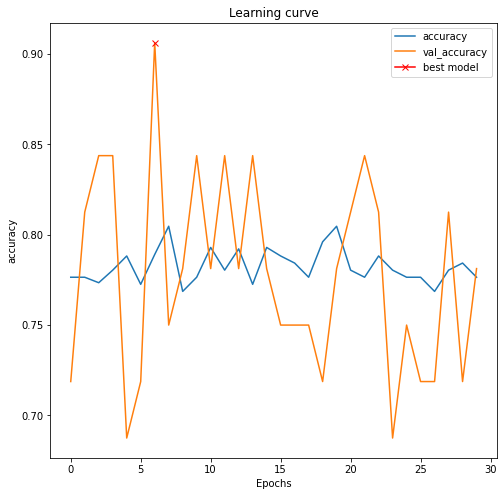

In [546]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(history.history["val_accuracy"]), np.max(history.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend();
plt.savefig("Learning_curve_for_30_epochs_dataset2.png")


In [547]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Test data accuracy: %.2f%%" % (scores[1]*100))

Test data accuracy: 78.12%


In [372]:
scores_ = model.predict(test_generator, nb_test_samples // batch_size) # use for 2nd dataset description

In [373]:
scores_

array([[0.08329883],
       [0.0793317 ],
       [0.06315795],
       [0.26828182],
       [0.10344338],
       [0.40116602],
       [0.370226  ],
       [0.16413954],
       [0.2938754 ],
       [0.4343876 ],
       [0.14064252],
       [0.31242013],
       [0.15549916],
       [0.4279068 ],
       [0.3871112 ],
       [0.27273795],
       [0.16413954],
       [0.33922607],
       [0.07762256],
       [0.11711454],
       [0.35359803],
       [0.33503002],
       [0.4279068 ],
       [0.0793317 ],
       [0.08859113],
       [0.46951377],
       [0.25391996],
       [0.42679942],
       [0.08859113],
       [0.0931268 ],
       [0.30121645],
       [0.3117511 ],
       [0.08102745],
       [0.12350559],
       [0.3961702 ],
       [0.26603788],
       [0.10064399],
       [0.31561604],
       [0.11711454],
       [0.2247889 ],
       [0.33588585],
       [0.25175187],
       [0.36930227],
       [0.1387046 ],
       [0.17738229],
       [0.17738229],
       [0.3263957 ],
       [0.275

In [553]:
import cv2
import imghdr
from keras.preprocessing import image
model = load_model('modelForPCprediction')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
def PCprediction():
    pc_path=data_dir+'/OilReservoir'
    images = []
    for img in os.listdir(pc_path):
        if "png" in img:
            img = os.path.join(pc_path, img)
            img = image.load_img(img, target_size=(img_width, img_height))
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            images.append(img)

    # stack up images list to pass for prediction
    images = np.vstack(images)
    classes = model.predict(images, batch_size=10)
    print(classes)
    
PCprediction()

[[0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44035858]
 [0.44

In [ ]:
root_dir = '/content/drive/My Drive/DeepCID/model_cnn'

    i=0
    for (root, dirs, files) in os.walk(root_dir):
        for d in dirs:
            print(dirs) 
            os.chdir(os.path.join(root, d))
            print(os.getcwd())
            datafile3 = './Xscale.npy'
            Xscale = np.load(datafile3)

In [ ]:
from pathlib import Path

root_dir = '/content/drive/My Drive/DeepCID/model_cnn'
datafile3 = 'Xscale.npy'

i=0
for (root, dirs, files) in os.walk(root_dir):
    for d in dirs:
        if not d.startswith('.'):
            fp = Path(root) / d / datafile3
            Xscale = np.load(str(fp))